## Computer Vision

1. Face Recognition:
Use CV to recognize faces for user's logins validation.

2. Image Similarity Search:
Use CV to search images with other image as query and find similar images.

## Face Recognition

In [1]:
from facenet_pytorch import InceptionResnetV1
import torch
import PIL
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mtcnn import MTCNN

/home/josealcocer27/.cache/pypoetry/virtualenvs/pycon-colombia-2024-rDJfgf35-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


GPU agnostic

In [2]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
device 

'cpu'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


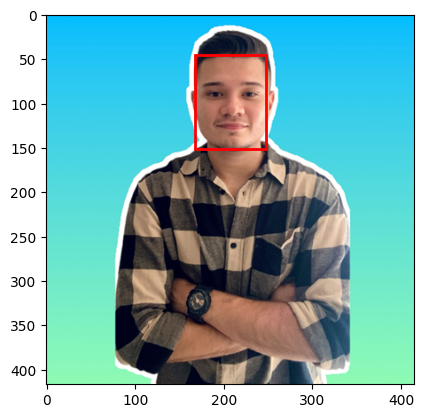

In [9]:
# Load and image
img = PIL.Image.open("../assets/me.png").convert(mode="RGB")

# Convert it to array
img = np.array(img)

# Create mtcc object
detector = MTCNN(min_face_size=30)

# Detect faces
resultados = detector.detect_faces(img)

# Plots
fig, ax = plt.subplots()
ax.imshow(img)
for resultado in resultados:
    x, y, w, h = resultado['box']
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
plt.show()


Let's use MTCNN tools from facenet_pytorch and crop the face 

In [10]:
del MTCNN
from facenet_pytorch import MTCNN

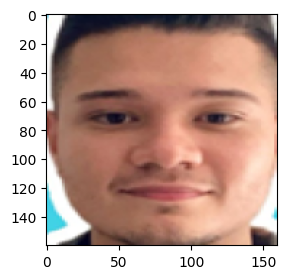

In [17]:
mtcnn = MTCNN(image_size=160, margin=5, min_face_size=35, post_process=False)
cropped_img = mtcnn(img).permute(1, 2, 0).int().numpy()
plt.figure(figsize=(3,3))
plt.imshow(cropped_img)
plt.show()

Let's compute a Embedding

In [24]:
mtcnn_detector = MTCNN(image_size=160, margin=5, min_face_size=35, post_process=True)
resnet = InceptionResnetV1(pretrained="vggface2", classify=False, device = device).eval()
cropped_img = mtcnn_detector(img)
cropped_img.

tensor([[[-0.0898,  0.0820,  0.9961,  ...,  0.8945,  0.9648,  0.9805],
         [ 0.0664,  0.2148,  0.9961,  ...,  0.8008,  0.9258,  0.9492],
         [ 0.2539,  0.3711,  0.9961,  ...,  0.7305,  0.8945,  0.9336],
         ...,
         [ 0.9883,  0.9883,  0.9961,  ..., -0.2539, -0.0586, -0.0195],
         [ 0.9883,  0.9883,  0.9883,  ..., -0.2539, -0.0430, -0.0039],
         [ 0.9883,  0.9883,  0.9883,  ..., -0.2461, -0.0195,  0.0273]],

        [[ 0.6055,  0.6680,  0.9961,  ...,  0.8867,  0.9570,  0.9727],
         [ 0.6680,  0.7227,  0.9961,  ...,  0.7930,  0.9180,  0.9414],
         [ 0.7383,  0.7852,  0.9961,  ...,  0.7148,  0.8867,  0.9180],
         ...,
         [ 0.9961,  0.9961,  0.9883,  ..., -0.3242, -0.1289, -0.0977],
         [ 0.9961,  0.9961,  0.9883,  ..., -0.3320, -0.1289, -0.0898],
         [ 0.9961,  0.9961,  0.9961,  ..., -0.3398, -0.1133, -0.0742]],

        [[ 0.8477,  0.8711,  0.9961,  ...,  0.8711,  0.9648,  0.9805],
         [ 0.8555,  0.8711,  0.9727,  ...,  0